In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [4]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_diabetes()
print(boston_dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [25]:
#Load the data and divide into X and Y varaiable
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 

# input 
X = boston_pd.iloc[:, :-1] 

#output 
Y = boston_pd.iloc[:, -1] 

print(boston_pd.head()) 


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  House Price  
0 -0.002592  0.019907 -0.017646        151.0  
1 -0.039493 -0.068332 -0.092204         75.0  
2 -0.002592  0.002861 -0.025930        141.0  
3  0.034309  0.022688 -0.009362        206.0  
4 -0.002592 -0.031988 -0.046641        135.0  


In [26]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [27]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1],
                                                    boston_pd.iloc[:, -1],
                                                    test_size=0.25)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((331, 10), (331,), (111, 10), (111,))

In [28]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 


Mean squared Error on test set :  2529.70137770439
  Columns  Coefficient Estimate
0     age            -60.045055
1     sex           -220.357318
2     bmi            479.031879
3      bp            333.345743
4      s1           -846.055945
5      s2            568.918481
6      s3            157.405166
7      s4            158.321462
8      s5            772.853336
9      s6             54.615535


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

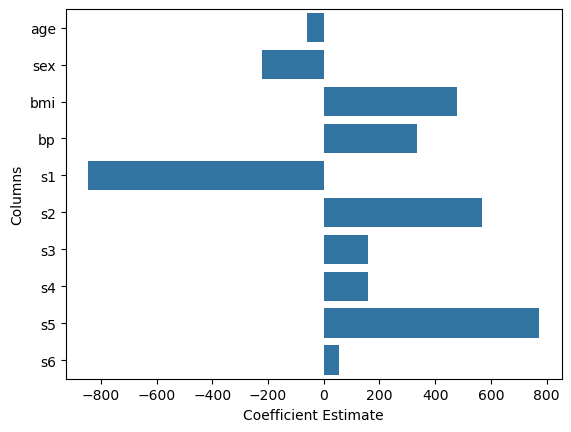

In [29]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [ ]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = .7) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient)

3310.78077831447
  Columns  Coefficient Estimate
0     age              1.262497
1     sex            -79.153484
2     bmi            282.054935
3      bp            204.591587
4      s1             23.526047
5      s2            -13.433541
6      s3           -132.240690
7      s4            109.342465
8      s5            258.110899
9      s6            105.693379


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

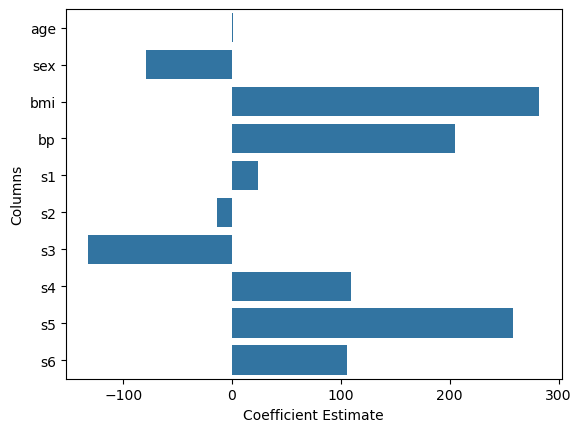

In [46]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

#### # import Lasso regression from sklearn library 



In [47]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = .7) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 3649.671666918776
  Columns  Coefficient Estimate
0     age              0.000000
1     sex             -0.000000
2     bmi            378.521334
3      bp             73.269819
4      s1              0.000000
5      s2              0.000000
6      s3             -0.000000
7      s4              0.000000
8      s5            366.053095
9      s6              0.000000


In [48]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .7,l1_ratio=.3) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 


Mean Squared Error on test set 6618.606170147586


,Columns,Coefficient Estimate
0,age,0.616589
1,sex,0.000000
2,bmi,3.505535
3,bp,2.606706
4,s1,1.319886
5,s2,1.033584
6,s3,-2.169529
7,s4,2.593743
8,s5,3.515939
9,s6,2.300577


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

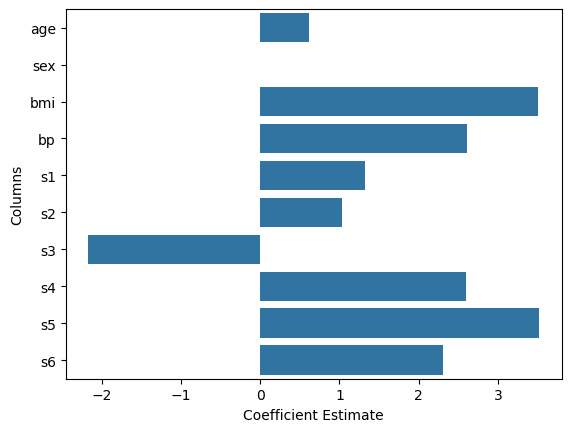

In [49]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff)